#     Project 2

# Question 1

In [6]:
# first import all the packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD

from scipy.sparse.linalg import svds


from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

from sklearn.decomposition import PCA



In [4]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories, 
                            shuffle=True, random_state=42)

stopwords = text.ENGLISH_STOP_WORDS
EXTRA = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'

dataset.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in dataset.data]
for punctuation in EXTRA:
    dataset.data = [s.replace(punctuation, ' ') for s in dataset.data]

#divide the dataset.target to 2 classes
for i in range(len(dataset.target)):
    if dataset.target[i] >= 0 and dataset.target[i] <= 3:
        dataset.target[i] = 0
    else:
        dataset.target[i] = 1    

count_vect = CountVectorizer(min_df=3, stop_words=stopwords)
dataset_counts = count_vect.fit_transform(dataset.data)
print "when min_df=3 "
print("extracted term number:", len(count_vect.get_feature_names()))
print(dataset_counts.shape)

tfidf_transform=TfidfTransformer()
dataset_tfidf=tfidf_transform.fit_transform(dataset_counts)
print(dataset_tfidf.shape)



when min_df=3 
('extracted term number:', 27399)
(7882, 27399)
(7882, 27399)


# Question 2

In [5]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories, 
                           shuffle=True, random_state=42)

stopwords = text.ENGLISH_STOP_WORDS
EXTRA = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'

dataset.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in dataset.data]
for punctuation in EXTRA:
    dataset.data = [s.replace(punctuation, ' ') for s in dataset.data]

#divide the dataset.target to 2 classes
for i in range(len(dataset.target)):
    if dataset.target[i] >= 0 and dataset.target[i] <= 3:
        dataset.target[i] = 0
    else:
        dataset.target[i] = 1    

labels = dataset.target
        
count_vect = CountVectorizer(min_df=3, stop_words=stopwords)
dataset_counts = count_vect.fit_transform(dataset.data)

tfidf_transform=TfidfTransformer()
dataset_tfidf=tfidf_transform.fit_transform(dataset_counts)



In [6]:
labels = dataset.target

km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
km.fit(dataset_tfidf)
print(dataset_tfidf.shape)

print 'Homogeneity:', metrics.homogeneity_score(labels, km.labels_)
print 'Completeness:', metrics.completeness_score(labels, km.labels_)
print 'V-measure:',  metrics.v_measure_score(labels, km.labels_)
print 'Adjusted Rand Score:', metrics.adjusted_rand_score(labels, km.labels_)
print 'Adjusted Mutual Info Score:', metrics.adjusted_mutual_info_score(labels, km.labels_)
print '\nContigency matrix:'
print '=============='
print metrics.confusion_matrix(labels, km.labels_)
print '=============='

(7882, 27399)
Homogeneity: 0.252498586446
Completeness: 0.333985362669
V-measure: 0.287581039838
Adjusted Rand Score: 0.179469093036
Adjusted Mutual Info Score: 0.252430144349

Contigency matrix:
[[   4 3899]
 [1712 2267]]


# Question 3

In [2]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories, 
                            shuffle=True, random_state=42)



stopwords = text.ENGLISH_STOP_WORDS
EXTRA = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'

dataset.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in dataset.data]
for punctuation in EXTRA:
    dataset.data = [s.replace(punctuation, ' ') for s in dataset.data]

#divide the dataset.target to 2 classes
for i in range(len(dataset.target)):
    if dataset.target[i] >= 0 and dataset.target[i] <= 3:
        dataset.target[i] = 0
    else:
        dataset.target[i] = 1    

labels = dataset.target
        
count_vect = CountVectorizer(min_df=3, stop_words=stopwords)
dataset_counts = count_vect.fit_transform(dataset.data)

tfidf_transform=TfidfTransformer()
dataset_tfidf=tfidf_transform.fit_transform(dataset_counts)


Calculating singular values...
Top 1000 singular values are:
[ 11.35003069   6.3377082    5.32542808   5.26458164   4.99901004
   4.4537293    4.4190145    4.32832677   4.24069334   4.12032959
   4.09323727   4.03412207   3.98713453   3.94289567   3.92282381
   3.87210699   3.8547972    3.81141411   3.7829806    3.73685435
   3.69046261   3.63582729   3.61746868   3.58992319   3.57758243
   3.54806936   3.52609116   3.49950216   3.47603916   3.45690236
   3.43745933   3.41668829   3.39366213   3.38275086   3.3706678
   3.36710274   3.3444607    3.33387941   3.3038907    3.29462826
   3.28051929   3.26315208   3.25968985   3.23744182   3.21653494
   3.21305862   3.20444282   3.18150979   3.1739552    3.1624949
   3.16041117   3.14103171   3.12537757   3.1145453    3.10525636
   3.0961692    3.08726503   3.08038214   3.07242181   3.06674267
   3.04864915   3.03771306   3.02405519   3.02266164   3.00377229
   2.99414103   2.98851434   2.97663589   2.97026562   2.96490596
   2.9567119    2

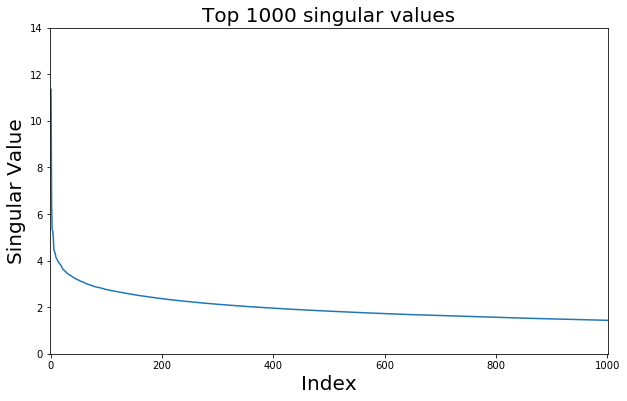

In [8]:
print 'Calculating singular values...'
num_of_singular_values = 1000
u, singular_values, vt = svds(dataset_tfidf.toarray(), num_of_singular_values)
singular_values = singular_values[::-1]
print 'Top',num_of_singular_values,'singular values are:'
print singular_values

plt.figure(figsize = (10,6))
plt.plot(range(1,1001), singular_values)
plt.ylabel('Singular Value', fontsize = 20)
plt.xlabel('Index', fontsize = 20)
plt.title('Top 1000 singular values', fontsize = 20)
plt.axis([-1,1001,0,14])
plt.show()

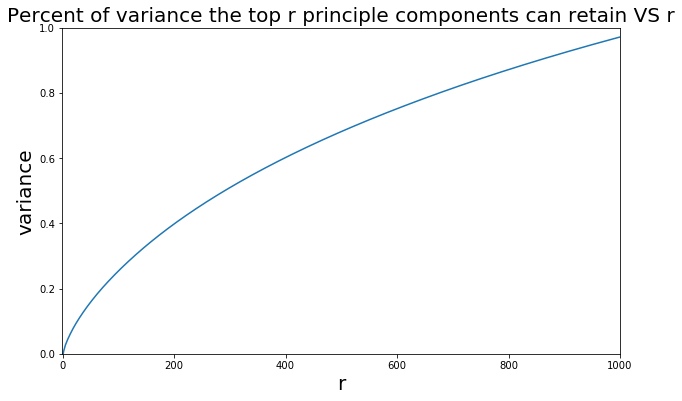

In [9]:

Var=[]
Dimension= range(1,1001)
for t in range(1,1001):
    sgr=singular_values[1:t]
    variance=np.square(sgr).sum()/np.square(singular_values).sum()
    Var.append(variance)

    
plt.figure(figsize = (10,6))
plt.plot(Dimension, Var)
plt.ylabel('variance', fontsize = 20)
plt.xlabel('r', fontsize = 20)
plt.title('Percent of variance the top r principle components can retain VS r', fontsize = 20)
plt.axis([-1,1000,0,1])
plt.show()

##############################################################
Performing truncatedSVD...reduce dimension to 1
Performing truncatedSVD...reduce dimension to 2
Performing truncatedSVD...reduce dimension to 3
Performing truncatedSVD...reduce dimension to 4
Performing truncatedSVD...reduce dimension to 5
Performing truncatedSVD...reduce dimension to 6
Performing truncatedSVD...reduce dimension to 10
Performing truncatedSVD...reduce dimension to 20
Performing truncatedSVD...reduce dimension to 50
Performing truncatedSVD...reduce dimension to 100
Performing truncatedSVD...reduce dimension to 300


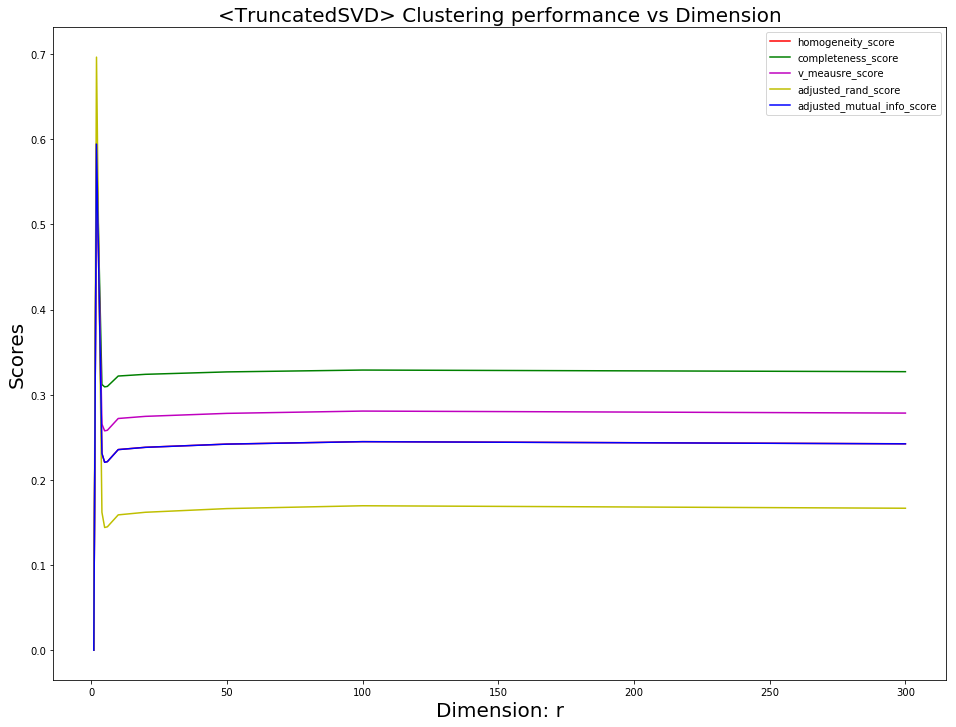

In [10]:

#=========================Reduce Dimensionality (SVD)==========================
dimension_array = [1,2,3,4,5,6,10,20,50,100,300]

print '##############################################################'
homos = []
cmplts = []
v_meas=[]
rands = []
mutuals = []

for d in dimension_array:
    print 'Performing truncatedSVD...reduce dimension to ' + str(d)
    svd = TruncatedSVD(n_components=d, random_state=42)
    transformed_tfidf = svd.fit_transform(dataset_tfidf)
    
    labels = dataset.target
    
    km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
    km.fit(transformed_tfidf)

    homo = metrics.homogeneity_score(labels, km.labels_)
    cmplt = metrics.completeness_score(labels, km.labels_)
    v_mea=metrics.v_measure_score(labels, km.labels_)
    rand = metrics.adjusted_rand_score(labels, km.labels_)
    mutual = metrics.adjusted_mutual_info_score(labels, km.labels_)

    homos.append(homo)
    cmplts.append(cmplt)
    v_meas.append(v_mea)
    rands.append(rand)
    mutuals.append(mutual)
    
plt.figure(figsize = (16,12))
plt.plot(dimension_array, homos, color='r', label='homogeneity_score')
plt.plot(dimension_array, cmplts, color='g', label='completeness_score')
plt.plot(dimension_array, v_meas, color='m', label='v_meausre_score')
plt.plot(dimension_array, rands, color='y', label='adjusted_rand_score')
plt.plot(dimension_array, mutuals, color='b', label='adjusted_mutual_info_score')
plt.legend()
plt.xlabel('Dimension: r',fontsize = 20)
plt.ylabel('Scores',fontsize = 20)
plt.title('<TruncatedSVD> Clustering performance vs Dimension',fontsize = 20)
plt.show()

#==============================================================================



In [11]:
# using SVD to find best value

km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)

r_set=[1,2,3,4,5,6,10,20,50,100,300]
for r in r_set:
    svd = TruncatedSVD(n_components=r, random_state=42)
    transformed_tfidf = svd.fit_transform(dataset_tfidf)
    print("Number of components: %d" %r)
    print("Dimensions of TF-IDF vector after LSI: "+ str(transformed_tfidf.shape))
    
    #labels = dataset.target
    
    km.fit(transformed_tfidf)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, km.labels_))
    
   
    print '\nContigency matrix:'
    print '=============='
    print metrics.confusion_matrix(labels, km.labels_)
    print '=============='
    
    print("=================================================")

Number of components: 1
Dimensions of TF-IDF vector after LSI: (7882L, 1L)
Homogeneity: 0.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand-Index: 0.000
Adjusted Mutual-Index: 0.000

Contigency matrix:
[[2189 1714]
 [2308 1671]]
Number of components: 2
Dimensions of TF-IDF vector after LSI: (7882L, 2L)
Homogeneity: 0.593
Completeness: 0.594
V-measure: 0.594
Adjusted Rand-Index: 0.695
Adjusted Mutual-Index: 0.593

Contigency matrix:
[[ 212 3691]
 [3536  443]]
Number of components: 3
Dimensions of TF-IDF vector after LSI: (7882L, 3L)
Homogeneity: 0.417
Completeness: 0.452
V-measure: 0.434
Adjusted Rand-Index: 0.419
Adjusted Mutual-Index: 0.417

Contigency matrix:
[[  38 3865]
 [2627 1352]]
Number of components: 4
Dimensions of TF-IDF vector after LSI: (7882L, 4L)
Homogeneity: 0.231
Completeness: 0.312
V-measure: 0.266
Adjusted Rand-Index: 0.162
Adjusted Mutual-Index: 0.231

Contigency matrix:
[[3890   13]
 [2341 1638]]
Number of components: 5
Dimensions of TF-IDF vector after LSI: (

In [3]:
#"Best value for SVD is 2"

svd = TruncatedSVD(n_components=2, random_state=42)
transformed_tfidf = svd.fit_transform(dataset_tfidf)
print "Best value for SVD is 2"
print("Number of components: 2")
print("Dimensions of TF-IDF vector after LSI: "+ str(transformed_tfidf.shape))

km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
   
km.fit(transformed_tfidf)
labels = dataset.target

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, km.labels_))
    
print '\nContigency matrix:'
print '=============='
print metrics.confusion_matrix(labels, km.labels_)
print '=============='
    
print("=================================================")

Best value for SVD is 2
Number of components: 2
Dimensions of TF-IDF vector after LSI: (7882, 2)
Homogeneity: 0.590
Completeness: 0.592
V-measure: 0.591
Adjusted Rand-Index: 0.691
Adjusted Mutual-Index: 0.590

Contigency matrix:
[[3705  198]
 [ 468 3511]]


##############################################################
Performing NMF...reduce dimension to 1
Performing NMF...reduce dimension to 2
Performing NMF...reduce dimension to 3
Performing NMF...reduce dimension to 4
Performing NMF...reduce dimension to 5
Performing NMF...reduce dimension to 6
Performing NMF...reduce dimension to 10
Performing NMF...reduce dimension to 20
Performing NMF...reduce dimension to 50
Performing NMF...reduce dimension to 100
Performing NMF...reduce dimension to 300


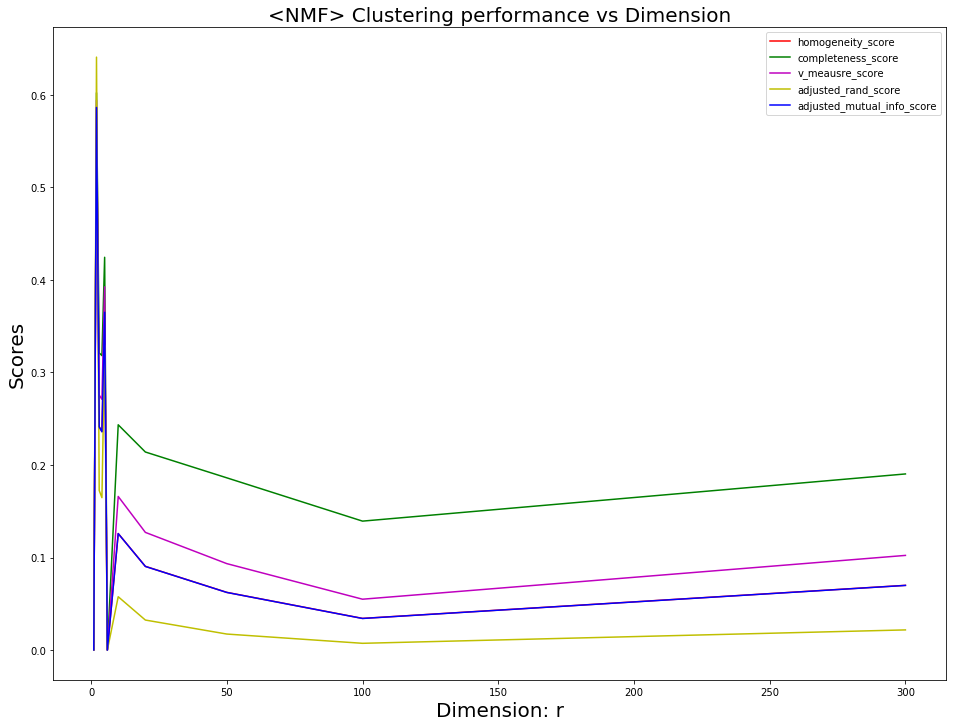

In [13]:
#=========================Reduce Dimensionality (NMF)==========================
dimension_array = [1,2,3,4,5,6,10,20,50,100,300]

print '##############################################################'
homos = []
cmplts = []
v_meas=[]
rands = []
mutuals = []

for d in dimension_array:
    print 'Performing NMF...reduce dimension to ' + str(d)
    nmf = NMF(n_components=d, init='random', random_state=0)
    nmf_mat= nmf.fit_transform(dataset_tfidf) 
    
    labels = dataset.target
    
    km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
    km.fit(nmf_mat)

    homo = metrics.homogeneity_score(labels, km.labels_)
    cmplt = metrics.completeness_score(labels, km.labels_)
    v_mea=metrics.v_measure_score(labels, km.labels_)
    rand = metrics.adjusted_rand_score(labels, km.labels_)
    mutual = metrics.adjusted_mutual_info_score(labels, km.labels_)

    homos.append(homo)
    cmplts.append(cmplt)
    v_meas.append(v_mea)
    rands.append(rand)
    mutuals.append(mutual)
    
plt.figure(figsize = (16,12))
plt.plot(dimension_array, homos, color='r', label='homogeneity_score')
plt.plot(dimension_array, cmplts, color='g', label='completeness_score')
plt.plot(dimension_array, v_meas, color='m', label='v_meausre_score')
plt.plot(dimension_array, rands, color='y', label='adjusted_rand_score')
plt.plot(dimension_array, mutuals, color='b', label='adjusted_mutual_info_score')
plt.legend()
plt.xlabel('Dimension: r',fontsize = 20)
plt.ylabel('Scores',fontsize = 20)
plt.title('<NMF> Clustering performance vs Dimension',fontsize = 20)
plt.show()

#==============================================================================



In [14]:
# using NMF to find the best value

r_set=[1,2,3,4,5,6,10,20,50,100,300]
for i in r_set:
    model = NMF(n_components=i, init='random', random_state=0)
    nmf_mat= model.fit_transform(dataset_tfidf) 
    print(dataset_tfidf.shape)
    print("Number of components: %d" %i)
    print("Dimensions of TF-IDF vector after NMF: "+ str(nmf_mat.shape))
    
    km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
    km.fit(nmf_mat)
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, km.labels_))
    
    print '\nContigency matrix:'
    print '=============='
    print metrics.confusion_matrix(labels, km.labels_)
    print '=============='
    
    print("=================================================")

(7882, 27399)
Number of components: 1
Dimensions of TF-IDF vector after NMF: (7882L, 1L)
Homogeneity: 0.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand-Index: 0.000
Adjusted Mutual-Index: 0.000

Contigency matrix:
[[1714 2189]
 [1671 2308]]
(7882, 27399)
Number of components: 2
Dimensions of TF-IDF vector after NMF: (7882L, 2L)
Homogeneity: 0.586
Completeness: 0.602
V-measure: 0.594
Adjusted Rand-Index: 0.641
Adjusted Mutual-Index: 0.586

Contigency matrix:
[[3153  750]
 [  36 3943]]
(7882, 27399)
Number of components: 3
Dimensions of TF-IDF vector after NMF: (7882L, 3L)
Homogeneity: 0.241
Completeness: 0.321
V-measure: 0.276
Adjusted Rand-Index: 0.172
Adjusted Mutual-Index: 0.241

Contigency matrix:
[[3892   11]
 [2293 1686]]
(7882, 27399)
Number of components: 4
Dimensions of TF-IDF vector after NMF: (7882L, 4L)
Homogeneity: 0.236
Completeness: 0.318
V-measure: 0.271
Adjusted Rand-Index: 0.165
Adjusted Mutual-Index: 0.236

Contigency matrix:
[[3894    9]
 [2332 1647]]
(7882, 2

In [15]:
#"Best value for NMF is 2"

print "Best value for NMF is 2"
model = NMF(n_components=2, init='random', random_state=0)
nmf_mat= model.fit_transform(dataset_tfidf) 
print "Original dataset shape: "
print(dataset_tfidf.shape)
print("Number of components: 2" )
print("Dimensions of TF-IDF vector after NMF: "+ str(nmf_mat.shape))
    
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
km.fit(nmf_mat)
    
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, km.labels_))
    
print '\nContigency matrix:'
print '=============='
print metrics.confusion_matrix(labels, km.labels_)
print '=============='
    
print("=================================================")

Best value for NMF is 2
Original dataset shape: 
(7882, 27399)
Number of components: 300
Dimensions of TF-IDF vector after NMF: (7882L, 2L)
Homogeneity: 0.586
Completeness: 0.602
V-measure: 0.594
Adjusted Rand-Index: 0.641
Adjusted Mutual-Index: 0.586

Contigency matrix:
[[ 750 3153]
 [3943   36]]


In [ ]:
# #Plot graph NMF to the data matrix with ambient parameter 2
# plt.figure(figsize = (12,8))
# plt.clf()
# plt.scatter(nmf_mat[:,0],nmf_mat[:,1] )
# plt.show()

In [17]:
# taking log of NMF mat values
# log_nmf_mat = np.log(0.01+nmf_mat)
# print(log_nmf_mat.shape)
# km = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10)
# km.fit(log_nmf_mat)
# print("number of components: 2")
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
# print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
# print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
# print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, km.labels_))
# print '\nContigency matrix:'
# print '=============='
# print metrics.confusion_matrix(labels, km.labels_)
# print '=============='
    

# Question 4

(7882L, 2L)


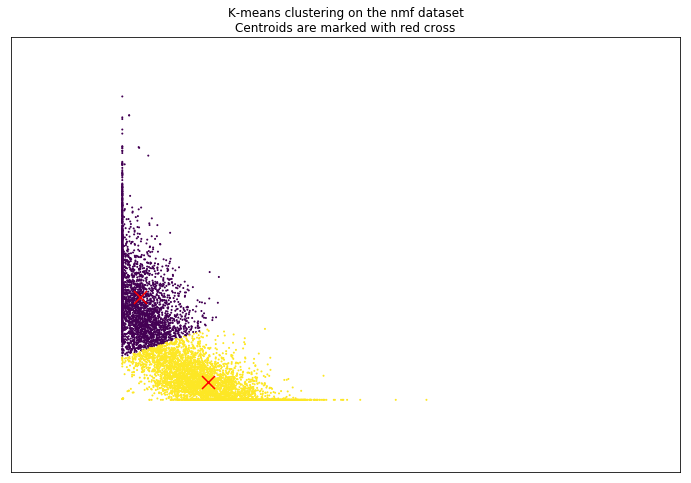

In [78]:
# part 4
import matplotlib.pyplot as plt

model = NMF(n_components=2, init='random', random_state=0)
nmf_mat= model.fit_transform(dataset_tfidf) 
print nmf_mat.shape
from sklearn.preprocessing import scale
kmeans=KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(nmf_mat)

# Step size of the mesh. Decrease to increase the quality of the VQ. 
h = .001
# point in the mesh [x_min, x_max]x[y_min, y_max]. 
# Plot the decision boundary. For that, we will assign a color to each 
#x_min, x_max = nmf_mat[:, 0].min() - 1,nmf_mat[:, 0].max() + 1 
#y_min, y_max = nmf_mat[:, 1].min() - 1, nmf_mat[:, 1].max() + 1 
x_min,x_max=-0.02,0.1
y_min,y_max=-0.02,0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
# Obtain labels for each point in mesh. Use last trained model. 
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot 
Z = Z.reshape(xx.shape) 
plt.figure(1) 
plt.figure(figsize = (12,8))
plt.clf() 
#plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower') 
#plt.plot(nmf_mat[:, 0], nmf_mat[:, 1], 'k.', markersize=2)
plt.scatter(nmf_mat[:, 0], nmf_mat[:, 1], c=kmeans.labels_,s=1)
# Plot the centroids as a white X 
centroids = kmeans.cluster_centers_ 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10) 
plt.title('K-means clustering on the nmf dataset\n' 'Centroids are marked with red cross')
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()

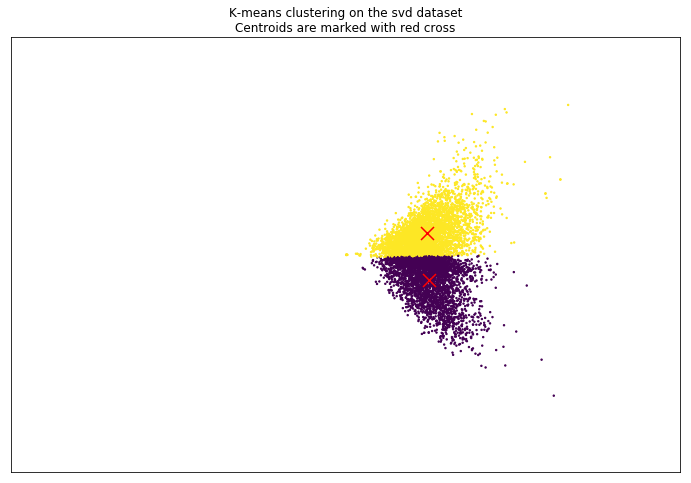

In [4]:
#transformed_tfidf = svd.fit_transform(dataset_tfidf)
svd = TruncatedSVD(n_components=2, random_state=42)
transformed_tfidf = svd.fit_transform(dataset_tfidf)

svd_data=transformed_tfidf
kmeans=KMeans(init='k-means++',n_clusters=2,max_iter=300,n_init=10)
kmeans.fit(svd_data)
h = .001
# point in the mesh [x_min, x_max]x[y_min, y_max]. 
# Plot the decision boundary. For that, we will assign a color to each 
#x_min, x_max = svd_data[:, 0].min() - 1,svd_data[:, 0].max() + 1 
#y_min, y_max = svd_data[:, 1].min() - 1, svd_data[:, 1].max() + 1 
x_min,x_max=-0.5,0.5
y_min,y_max=-0.5,0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
# Obtain labels for each point in mesh. Use last trained model. 
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot 
Z = Z.reshape(xx.shape) 
plt.figure(1) 
plt.figure(figsize = (12,8))
plt.clf() 
#plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower') 
#plt.plot(svd_data[:, 0], svd_data[:, 1], 'k.', markersize=2)
plt.scatter(svd_data[:, 0], svd_data[:, 1], c=kmeans.labels_,s=2)
# Plot the centroids as a white X 
centroids = kmeans.cluster_centers_ 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10) 
plt.title('K-means clustering on the svd dataset\n' 'Centroids are marked with red cross')
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()

## Question 4b normalizor 

[[-0.30427181  0.27740201]
 [-1.04847102  0.83141036]
 [-1.2731568   2.05889372]
 ..., 
 [-0.60773816 -0.01331458]
 [ 0.10215304  0.25327875]
 [-0.18703444 -0.49858846]]
[0 0 0 ..., 0 0 1]


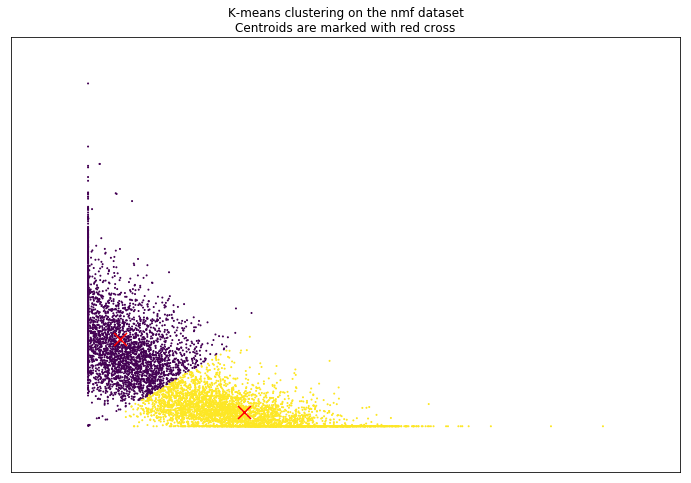

Homogeneity: 0.686
Completeness: 0.689
V-measure: 0.687
Adjusted Rand-Index: 0.777
Adjusted Mutual-Index: 0.686


In [86]:
#part 4b normalizor 

#dataset_tfidf

from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
#norm_data=normalize(dataset_tfidf)

nmf_norm=scale(nmf_mat)
print (nmf_norm)
kmeans=KMeans(init='k-means++',n_clusters=2,max_iter=300,n_init=10)
kmeans.fit(nmf_norm)

# Step size of the mesh. Decrease to increase the quality of the VQ. 
h = .001
# point in the mesh [x_min, x_max]x[y_min, y_max]. 
# Plot the decision boundary. For that, we will assign a color to each 
x_min, x_max = nmf_norm[:, 0].min() - 1,nmf_norm[:, 0].max() + 1 
y_min, y_max = nmf_norm[:, 1].min() - 1, nmf_norm[:, 1].max() + 1 
#x_min,x_max=-0.02,0.1
#y_min,y_max=-0.02,0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
# Obtain labels for each point in mesh. Use last trained model. 
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot 
Z = Z.reshape(xx.shape) 
plt.figure(1) 
plt.figure(figsize = (12,8))
plt.clf() 
#plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower') 
#plt.plot(nmf_norm[:, 0], nmf_norm[:, 1], 'k.', markersize=2)
print(kmeans.labels_)
plt.scatter(nmf_norm[:, 0],nmf_norm[:, 1],s=1,c=kmeans.labels_)
# Plot the centroids as a white X 
centroids = kmeans.cluster_centers_ 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10) 
plt.title('K-means clustering on the nmf dataset\n' 'Centroids are marked with red cross')
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, kmeans.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, kmeans.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, kmeans.labels_))

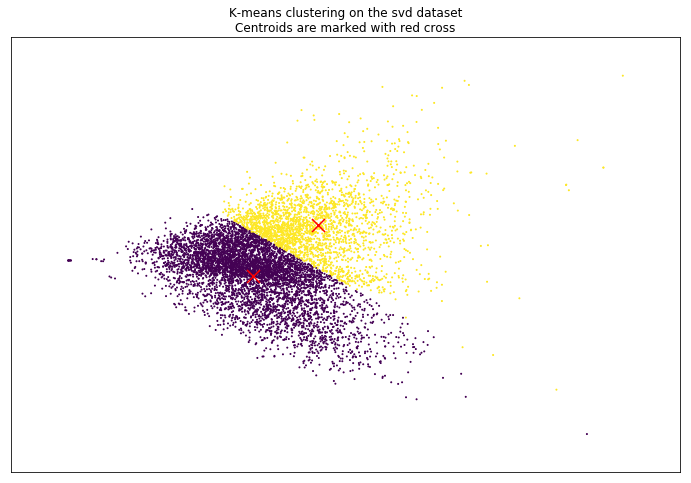

Homogeneity: 0.222
Completeness: 0.252
V-measure: 0.236
Adjusted Rand-Index: 0.238
Adjusted Mutual-Index: 0.222


In [7]:
#transformed_tfidf = svd.fit_transform(dataset_tfidf)
# SVD with normalization
svd_norm=scale(svd_data)
kmeans=KMeans(init='k-means++',n_clusters=2,max_iter=300,n_init=10)
kmeans.fit(svd_norm)
h = .001
# point in the mesh [x_min, x_max]x[y_min, y_max]. 
# Plot the decision boundary. For that, we will assign a color to each 
x_min, x_max = svd_norm[:, 0].min() - 1,svd_norm[:, 0].max() + 1 
y_min, y_max = svd_norm[:, 1].min() - 1, svd_norm[:, 1].max() + 1 
#x_min,x_max=-0.5,0.5
#y_min,y_max=-0.5,0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
# Obtain labels for each point in mesh. Use last trained model. 
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot 
Z = Z.reshape(xx.shape) 
plt.figure(1) 
plt.figure(figsize = (12,8))
plt.clf() 
#plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower') 
#plt.plot(svd_data[:, 0], svd_data[:, 1], 'k.', markersize=2)
plt.scatter(svd_norm[:, 0], svd_norm[:, 1], c=kmeans.labels_,s=1)
# Plot the centroids as a white X 
centroids = kmeans.cluster_centers_ 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10) 
plt.title('K-means clustering on the svd dataset\n' 'Centroids are marked with red cross')
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, kmeans.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, kmeans.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, kmeans.labels_))

(7882L, 2L)


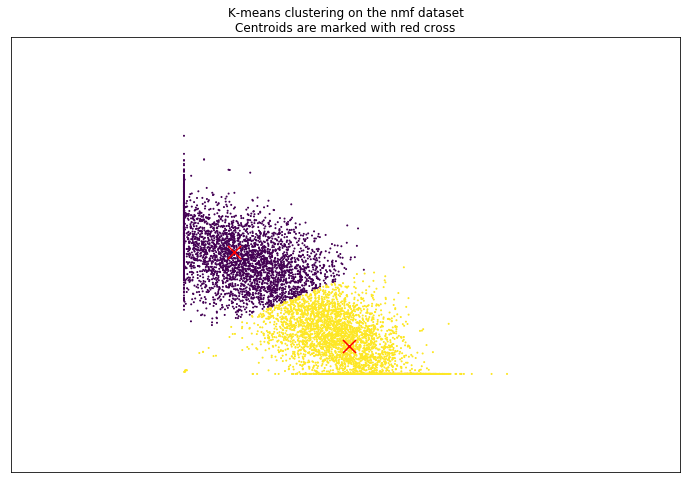

Homogeneity: 0.704
Completeness: 0.705
V-measure: 0.705
Adjusted Rand-Index: 0.799
Adjusted Mutual-Index: 0.704


In [94]:
#non-linear transformation (log)
log_nmf_mat = np.log(0.01+nmf_mat)
print(log_nmf_mat.shape)
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
km.fit(log_nmf_mat)


# Step size of the mesh. Decrease to increase the quality of the VQ. 
h = .02
# point in the mesh [x_min, x_max]x[y_min, y_max]. 
# Plot the decision boundary. For that, we will assign a color to each 
x_min, x_max = log_nmf_mat[:, 0].min() - 1,log_nmf_mat[:, 0].max() + 1 
y_min, y_max = log_nmf_mat[:, 1].min() - 1, log_nmf_mat[:, 1].max() + 1 
#x_min,x_max=-1,10
#y_min,y_max=-10,10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
# Obtain labels for each point in mesh. Use last trained model. 
Z = km.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot 
Z = Z.reshape(xx.shape) 
plt.figure(1) 
plt.figure(figsize = (12,8))
plt.clf() 
#plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower') 
#plt.plot(log_nmf_mat[:, 0], log_nmf_mat[:, 1], 'k.', markersize=2)
plt.scatter(log_nmf_mat[:, 0], log_nmf_mat[:, 1], c=km.labels_,s=1)
# Plot the centroids as a white X 
centroids = km.cluster_centers_ 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10) 
plt.title('K-means clustering on the nmf dataset\n' 'Centroids are marked with red cross')
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 

plt.show()
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, km.labels_))

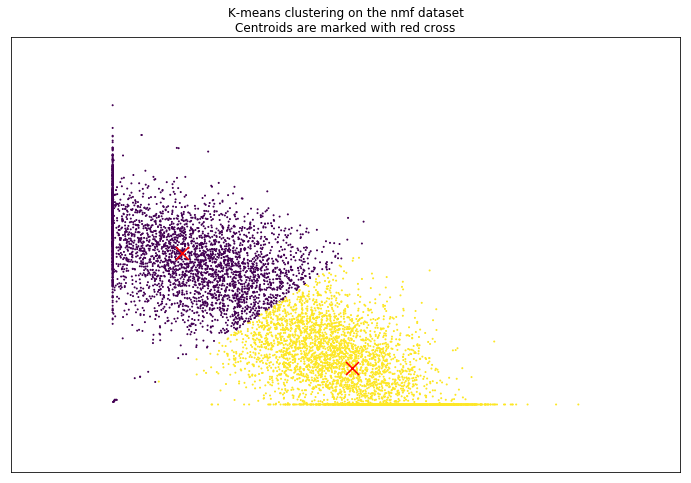

Homogeneity: 0.702
Completeness: 0.704
V-measure: 0.703
Adjusted Rand-Index: 0.797
Adjusted Mutual-Index: 0.702


In [95]:
#log first then norm
log_nmf_mat = np.log(0.01+nmf_mat)
log_norm=scale(log_nmf_mat)



km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
km.fit(log_norm)


# Step size of the mesh. Decrease to increase the quality of the VQ. 
h = .02
# point in the mesh [x_min, x_max]x[y_min, y_max]. 
# Plot the decision boundary. For that, we will assign a color to each 
x_min, x_max = log_norm[:, 0].min() - 1,log_norm[:, 0].max() + 1 
y_min, y_max = log_norm[:, 1].min() - 1, log_norm[:, 1].max() + 1 
#x_min,x_max=-1,1
#y_min,y_max=-1,1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
# Obtain labels for each point in mesh. Use last trained model. 
Z = km.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot 
Z = Z.reshape(xx.shape) 
plt.figure(1) 
plt.figure(figsize = (12,8))
plt.clf() 
#plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower') 
#plt.plot(log_norm[:, 0], log_norm[:, 1], 'k.', markersize=2)
plt.scatter(log_norm[:, 0], log_norm[:, 1], c=km.labels_,s=1)
# Plot the centroids as a white X 
centroids = km.cluster_centers_ 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10) 
plt.title('K-means clustering on the nmf dataset\n' 'Centroids are marked with red cross')
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, km.labels_))

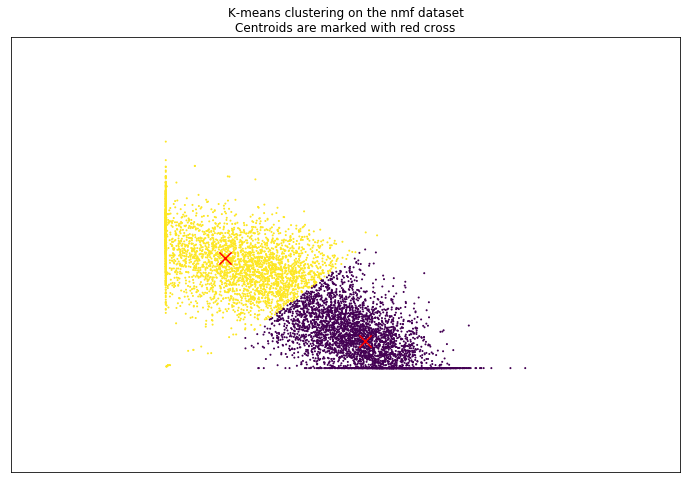

Homogeneity: 0.665
Completeness: 0.669
V-measure: 0.667
Adjusted Rand-Index: 0.753
Adjusted Mutual-Index: 0.665


In [112]:
#norm first then log
#print nmf_mat
nmf_norm_1=scale(nmf_mat)
#print (nmf_norm_1)
log_nmf_mat = np.log(2+nmf_norm_1) ##not able to get negtive number with a samll addition
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
km.fit(log_nmf_mat)


# Step size of the mesh. Decrease to increase the quality of the VQ. 
h = .02
# point in the mesh [x_min, x_max]x[y_min, y_max]. 
# Plot the decision boundary. For that, we will assign a color to each 
x_min, x_max = log_nmf_mat[:, 0].min() - 1,log_nmf_mat[:, 0].max() + 1 
y_min, y_max = log_nmf_mat[:, 1].min() - 1, log_nmf_mat[:, 1].max() + 1 
#x_min,x_max=-1,10
#y_min,y_max=-10,10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
# Obtain labels for each point in mesh. Use last trained model. 
Z = km.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot 
Z = Z.reshape(xx.shape) 
plt.figure(1) 
plt.figure(figsize = (12,8))
plt.clf() 
#plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower') 
#plt.plot(log_nmf_mat[:, 0], log_nmf_mat[:, 1], 'ko', markersize=1)
plt.scatter(log_nmf_mat[:, 0], log_nmf_mat[:, 1], c=km.labels_,s=1)
# Plot the centroids as a white X 
centroids = km.cluster_centers_ 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150, linewidths=3, color='r', zorder=10) 
plt.title('K-means clustering on the nmf dataset\n' 'Centroids are marked with red cross')
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 

plt.show()
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, km.labels_))

# Question 5

In [20]:
# part1
allset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

stopwords = text.ENGLISH_STOP_WORDS
EXTRA = '[! \" # $ % \& \' \( \) \* + , \- \. \/ : ; < = > ? @ \[ \\ \] ^ _ ` { \| } ~]'

allset.data = [s.replace('\r',' ').replace('\n',' ').replace('\t',' ') for s in allset.data]
for punctuation in EXTRA:
    allset.data = [s.replace(punctuation, ' ') for s in allset.data]


count_vect = CountVectorizer(min_df=3, stop_words=stopwords)
allset_counts = count_vect.fit_transform(allset.data)
print "when min_df=3 "
print("extracted term number:", len(count_vect.get_feature_names()))
print(allset_counts.shape)

tfidf_transform=TfidfTransformer()
allset_tfidf=tfidf_transform.fit_transform(allset_counts)
print(allset_tfidf.shape)



when min_df=3 
('extracted term number:', 51729)
(18846, 51729)
(18846, 51729)


In [114]:
#part2

labels = allset.target

km = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10)
km.fit(allset_tfidf)
print(allset_tfidf.shape)

print 'Homogeneity:', metrics.homogeneity_score(labels, km.labels_)
print 'Completeness:', metrics.completeness_score(labels, km.labels_)
print 'V-measure:',  metrics.v_measure_score(labels, km.labels_)
print 'Adjusted Rand Score:', metrics.adjusted_rand_score(labels, km.labels_)
print 'Adjusted Mutual Info Score:', metrics.adjusted_mutual_info_score(labels, km.labels_)
print '\nContigency matrix:'
print '=============='
print metrics.confusion_matrix(labels, km.labels_)
print '=============='

(18846, 51729)
Homogeneity: 0.284162983471
Completeness: 0.350029655297
V-measure: 0.313675893009
Adjusted Rand Score: 0.102136000485
Adjusted Mutual Info Score: 0.281833502495

Contigency matrix:
[[  0   0   0  91  28   4   0   0  27  70   0 144 180 165   0   0   0   1
   89   0]
 [  0   0   2 111   7   1   0   0  19  81 202   2   1 237   1   2   0   0
  190 117]
 [  0   0   2  58  15   0   0   0  13  33 555   1   0  87   6  11   8   0
   98  98]
 [  1   0   3 105  30   0   0   0   8  26  66   0   0  92   1   5 170   0
   98 377]
 [  0   0  14  55  26   0   0   0  20  22   9   1   0  95   1   1  57   0
  149 513]
 [  0   0   2 132   4   0   0   0   2  89 400   0   0 193   2   2   0   4
  149   9]
 [ 11   0  33 138  14   6   0   0   4   5  21   0   0 170  14   8  34   0
  355 162]
 [  0   0  32 282  23   4   0   0  45  21   3   3   0 406   2   1   0   0
  168   0]
 [  0   0   7 404   9   0   0   0  12 104   0   1   0 281   0   1   0   0
  177   0]
 [333   0   7 151   3   4   0   0  27 

In [115]:
# part3

# #print 'Calculating singular values...'
# num_of_singular_values = 1000
# u, singular_values, vt = svds(allset_tfidf.toarray(), num_of_singular_values)

# singular_values = singular_values[::-1]
# # print 'Top',num_of_singular_values,'singular values are:'
# # print singular_values

# # plt.figure(figsize = (10,6))
# plt.plot(range(1,1001), singular_values)
# plt.ylabel('Singular Value', fontsize = 20)
# plt.xlabel('Index', fontsize = 20)
# plt.title('Top 1000 singular values', fontsize = 20)
# plt.axis([-1,1001,0,14])
# plt.show()

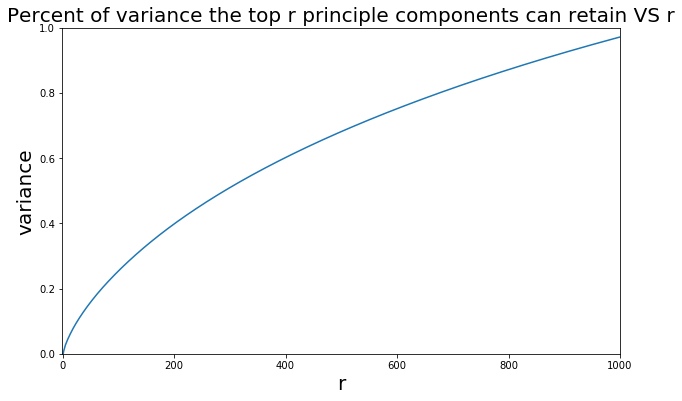

In [116]:

# Var=[]
# Dimension= range(1,1001)
# for t in range(1,1001):
#     sgr=singular_values[1:t]
#     variance=np.square(sgr).sum()/np.square(singular_values).sum()
#     Var.append(variance)

    
# plt.figure(figsize = (10,6))
# plt.plot(Dimension, Var)
# plt.ylabel('variance', fontsize = 20)
# plt.xlabel('r', fontsize = 20)
# plt.title('Percent of variance the top r principle components can retain VS r', fontsize = 20)
# plt.axis([-1,1000,0,1])
# plt.show()

##############################################################
Performing truncatedSVD...reduce dimension to 1
Performing truncatedSVD...reduce dimension to 2
Performing truncatedSVD...reduce dimension to 3
Performing truncatedSVD...reduce dimension to 4
Performing truncatedSVD...reduce dimension to 5
Performing truncatedSVD...reduce dimension to 6
Performing truncatedSVD...reduce dimension to 10
Performing truncatedSVD...reduce dimension to 20
Performing truncatedSVD...reduce dimension to 50
Performing truncatedSVD...reduce dimension to 100
Performing truncatedSVD...reduce dimension to 300


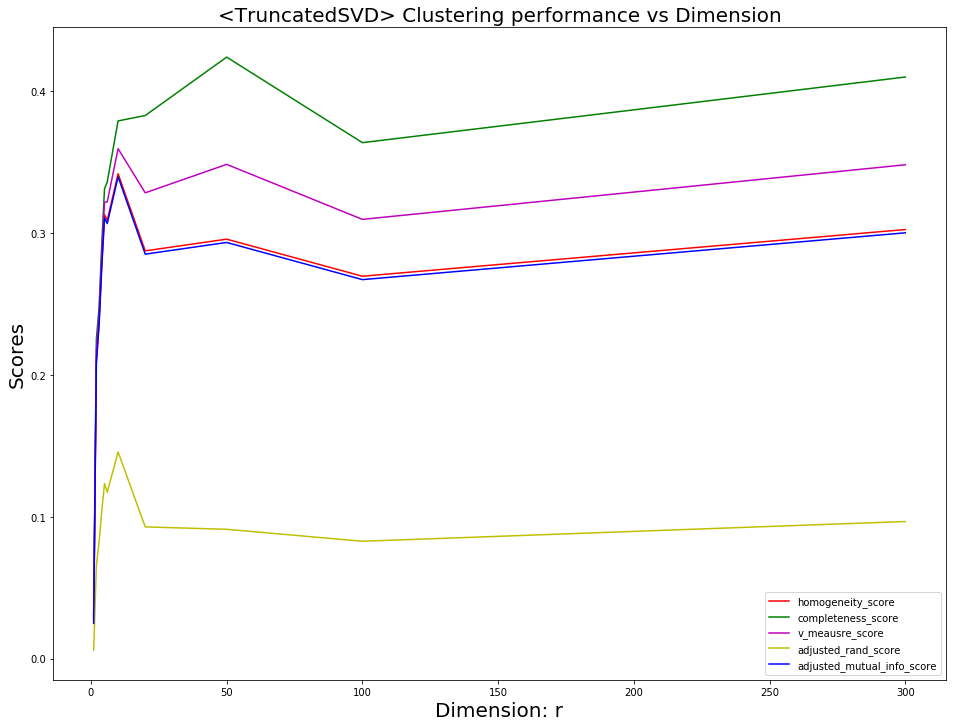

In [21]:
#=========================Reduce Dimensionality (SVD)==========================

dimension_array = [1,2,3,4,5,6,10,20,50,100,300]

print '##############################################################'
homos = []
cmplts = []
v_meas=[]
rands = []
mutuals = []

for d in dimension_array:
    print 'Performing truncatedSVD...reduce dimension to ' + str(d)
    svd = TruncatedSVD(n_components=d, random_state=42)
    transformed_tfidf = svd.fit_transform(allset_tfidf)
    
    labels = allset.target
    
    km = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10)
    km.fit(transformed_tfidf)

    homo = metrics.homogeneity_score(labels, km.labels_)
    cmplt = metrics.completeness_score(labels, km.labels_)
    v_mea=metrics.v_measure_score(labels, km.labels_)
    rand = metrics.adjusted_rand_score(labels, km.labels_)
    mutual = metrics.adjusted_mutual_info_score(labels, km.labels_)

    homos.append(homo)
    cmplts.append(cmplt)
    v_meas.append(v_mea)
    rands.append(rand)
    mutuals.append(mutual)
    
plt.figure(figsize = (16,12))
plt.plot(dimension_array, homos, color='r', label='homogeneity_score')
plt.plot(dimension_array, cmplts, color='g', label='completeness_score')
plt.plot(dimension_array, v_meas, color='m', label='v_meausre_score')
plt.plot(dimension_array, rands, color='y', label='adjusted_rand_score')
plt.plot(dimension_array, mutuals, color='b', label='adjusted_mutual_info_score')
plt.legend()
plt.xlabel('Dimension: r',fontsize = 20)
plt.ylabel('Scores',fontsize = 20)
plt.title('<TruncatedSVD> Clustering performance vs Dimension',fontsize = 20)
plt.show()

#==============================================================================




In [22]:
# using SVD to find best value

km = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10)

r_set=[1,2,3,4,5,6,8,10,20,50,100,300]
for r in r_set:
    svd = TruncatedSVD(n_components=r, random_state=42)
    transformed_tfidf = svd.fit_transform(allset_tfidf)
    print("Number of components: %d" %r)
    print("Dimensions of TF-IDF vector after LSI: "+ str(transformed_tfidf.shape))
    
    labels = allset.target
    
    km.fit(transformed_tfidf)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, km.labels_))
    

#     print '=============='
#     print metrics.confusion_matrix(labels, km.labels_)
#     print '=============='
    
#     print("=================================================")

Number of components: 1
Dimensions of TF-IDF vector after LSI: (18846, 1)
Homogeneity: 0.028
Completeness: 0.031
V-measure: 0.029
Adjusted Rand-Index: 0.006
Adjusted Mutual-Index: 0.025
Number of components: 2
Dimensions of TF-IDF vector after LSI: (18846, 2)
Homogeneity: 0.211
Completeness: 0.225
V-measure: 0.218
Adjusted Rand-Index: 0.066
Adjusted Mutual-Index: 0.208
Number of components: 3
Dimensions of TF-IDF vector after LSI: (18846, 3)
Homogeneity: 0.235
Completeness: 0.244
V-measure: 0.239
Adjusted Rand-Index: 0.081
Adjusted Mutual-Index: 0.232
Number of components: 4
Dimensions of TF-IDF vector after LSI: (18846, 4)
Homogeneity: 0.279
Completeness: 0.294
V-measure: 0.287
Adjusted Rand-Index: 0.105
Adjusted Mutual-Index: 0.277
Number of components: 5
Dimensions of TF-IDF vector after LSI: (18846, 5)
Homogeneity: 0.309
Completeness: 0.327
V-measure: 0.318
Adjusted Rand-Index: 0.123
Adjusted Mutual-Index: 0.307
Number of components: 6
Dimensions of TF-IDF vector after LSI: (18846,

In [18]:
#"Best value for SVD is 10"

svd = TruncatedSVD(n_components=10, random_state=42)
transformed_tfidf = svd.fit_transform(allset_tfidf)
print "Best value for SVD is 10"
print("Number of components: 10")
print("Dimensions of TF-IDF vector after LSI: "+ str(transformed_tfidf.shape))

km = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10)
   
km.fit(transformed_tfidf)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, km.labels_))
    
print '\nContigency matrix:'
print '=============='
print metrics.confusion_matrix(labels, km.labels_)
print '=============='
    
print("=================================================")

Best value for SVD is 10
Number of components: 10
Dimensions of TF-IDF vector after LSI: (18846, 10)
Homogeneity: 0.339
Completeness: 0.378
V-measure: 0.358
Adjusted Rand-Index: 0.139
Adjusted Mutual-Index: 0.337

Contigency matrix:
[[ 74  33  37  35   1   0   0 242  53   0   1 174   0  10 133   0   0   0
    0   6]
 [171 166   3  77   0   0   0   1   0   0  16  11   0 424   1   1   0  26
   67   9]
 [ 89  73   2  56   0   0   0   0   0   2   4   6   0 362   0   0   0  43
  339   9]
 [110 120   0 111   0   4   0   0   0 105   5   3   0 131   0   3   0 326
   37  27]
 [251 195   1  78   0   2   0   0   0  23   8   8   0  95   0   0   0 264
    7  31]
 [109 128   0  94   0   0   0   0   0   0  22   3   0 525   0   6   0   1
   96   4]
 [318 262   1 115   0  16   0   1   0  18   6   9   3  32   1   0   0 130
   16  47]
 [183 274  41 337   0   8   0   0   0   0   8  74   0  10   4   0   0   2
    0  49]
 [134 222  15 449   0  28   0   5   0   0  16  54   0  30  25   0   0   2
    0  16]
 [

##############################################################
Performing NMF...reduce dimension to 1
Performing NMF...reduce dimension to 2
Performing NMF...reduce dimension to 3
Performing NMF...reduce dimension to 4
Performing NMF...reduce dimension to 5
Performing NMF...reduce dimension to 6
Performing NMF...reduce dimension to 10
Performing NMF...reduce dimension to 20
Performing NMF...reduce dimension to 50
Performing NMF...reduce dimension to 100
Performing NMF...reduce dimension to 300


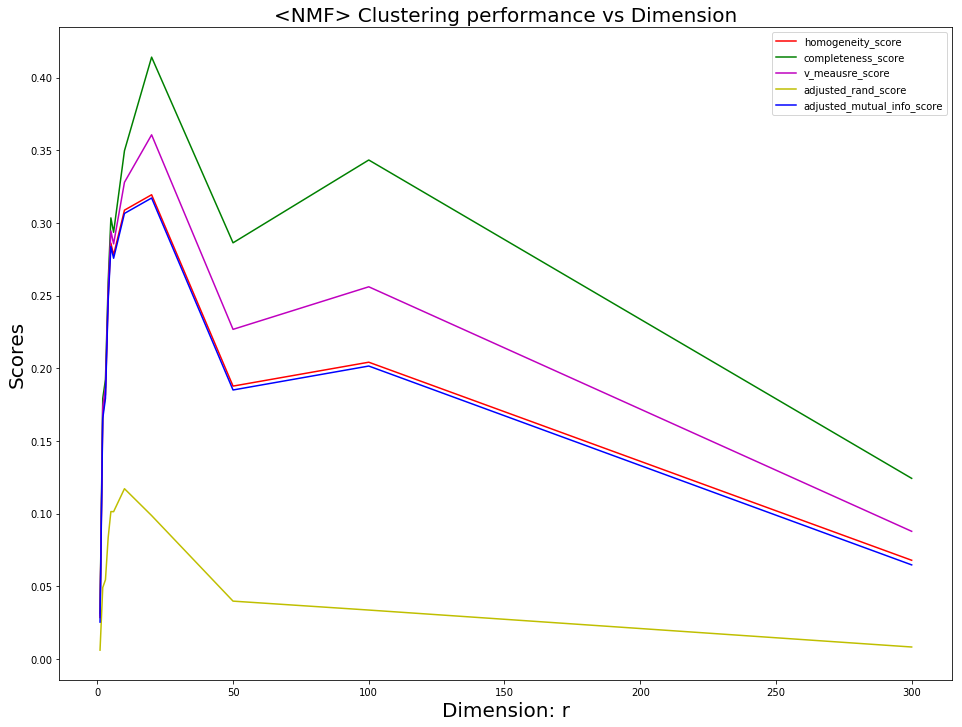

In [9]:
#=========================Reduce Dimensionality (NMF)==========================
dimension_array = [1,2,3,4,5,6,10,20,50,100,300]

print '##############################################################'
homos = []
cmplts = []
v_meas=[]
rands = []
mutuals = []

for d in dimension_array:
    print 'Performing NMF...reduce dimension to ' + str(d)
    nmf = NMF(n_components=d, init='random', random_state=0)
    nmf_mat= nmf.fit_transform(allset_tfidf) 
    
    labels = allset.target
    
    km = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10)
    km.fit(nmf_mat)

    homo = metrics.homogeneity_score(labels, km.labels_)
    cmplt = metrics.completeness_score(labels, km.labels_)
    v_mea=metrics.v_measure_score(labels, km.labels_)
    rand = metrics.adjusted_rand_score(labels, km.labels_)
    mutual = metrics.adjusted_mutual_info_score(labels, km.labels_)

    homos.append(homo)
    cmplts.append(cmplt)
    v_meas.append(v_mea)
    rands.append(rand)
    mutuals.append(mutual)
    
plt.figure(figsize = (16,12))
plt.plot(dimension_array, homos, color='r', label='homogeneity_score')
plt.plot(dimension_array, cmplts, color='g', label='completeness_score')
plt.plot(dimension_array, v_meas, color='m', label='v_meausre_score')
plt.plot(dimension_array, rands, color='y', label='adjusted_rand_score')
plt.plot(dimension_array, mutuals, color='b', label='adjusted_mutual_info_score')
plt.legend()
plt.xlabel('Dimension: r',fontsize = 20)
plt.ylabel('Scores',fontsize = 20)
plt.title('<NMF> Clustering performance vs Dimension',fontsize = 20)
plt.show()

#==============================================================================




In [10]:
# using NMF to find the best value

r_set=[1,2,3,4,5,6,10,20,50,100,300]
for i in r_set:
    model = NMF(n_components=i, init='random', random_state=0)
    nmf_mat= model.fit_transform(allset_tfidf) 
    print(allset_tfidf.shape)
    print("Number of components: %d" %i)
    print("Dimensions of TF-IDF vector after NMF: "+ str(nmf_mat.shape))
    
    km = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10)
    km.fit(nmf_mat)
    labels = allset.target
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, km.labels_))
    
#     print '\nContigency matrix:'
#     print '=============='
#     print metrics.confusion_matrix(labels, km.labels_)
#     print '=============='
    
#     print("=================================================")

(18846, 51729)
Number of components: 1
Dimensions of TF-IDF vector after NMF: (18846, 1)
Homogeneity: 0.028
Completeness: 0.031
V-measure: 0.030
Adjusted Rand-Index: 0.006
Adjusted Mutual-Index: 0.025
(18846, 51729)
Number of components: 2
Dimensions of TF-IDF vector after NMF: (18846, 2)
Homogeneity: 0.166
Completeness: 0.178
V-measure: 0.172
Adjusted Rand-Index: 0.048
Adjusted Mutual-Index: 0.163
(18846, 51729)
Number of components: 3
Dimensions of TF-IDF vector after NMF: (18846, 3)
Homogeneity: 0.182
Completeness: 0.192
V-measure: 0.187
Adjusted Rand-Index: 0.055
Adjusted Mutual-Index: 0.179
(18846, 51729)
Number of components: 4
Dimensions of TF-IDF vector after NMF: (18846, 4)
Homogeneity: 0.249
Completeness: 0.259
V-measure: 0.254
Adjusted Rand-Index: 0.083
Adjusted Mutual-Index: 0.246
(18846, 51729)
Number of components: 5
Dimensions of TF-IDF vector after NMF: (18846, 5)
Homogeneity: 0.286
Completeness: 0.300
V-measure: 0.293
Adjusted Rand-Index: 0.104
Adjusted Mutual-Index: 0

In [11]:
# allocate r more accurate to find best value for NMF
r_set=[10,12,15,18,20,21,22,23,24,25,30]
for i in r_set:
    model = NMF(n_components=i, init='random', random_state=0)
    nmf_mat= model.fit_transform(allset_tfidf) 
    print(allset_tfidf.shape)
    print("Number of components: %d" %i)
    print("Dimensions of TF-IDF vector after NMF: "+ str(nmf_mat.shape))
    
    km = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10)
    km.fit(nmf_mat)
    labels = allset.target
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, km.labels_))
    

(18846, 51729)
Number of components: 10
Dimensions of TF-IDF vector after NMF: (18846, 10)
Homogeneity: 0.309
Completeness: 0.351
V-measure: 0.329
Adjusted Rand-Index: 0.120
Adjusted Mutual-Index: 0.307
(18846, 51729)
Number of components: 12
Dimensions of TF-IDF vector after NMF: (18846, 12)
Homogeneity: 0.309
Completeness: 0.362
V-measure: 0.333
Adjusted Rand-Index: 0.118
Adjusted Mutual-Index: 0.307
(18846, 51729)
Number of components: 15
Dimensions of TF-IDF vector after NMF: (18846, 15)
Homogeneity: 0.282
Completeness: 0.331
V-measure: 0.304
Adjusted Rand-Index: 0.099
Adjusted Mutual-Index: 0.279
(18846, 51729)
Number of components: 18
Dimensions of TF-IDF vector after NMF: (18846, 18)
Homogeneity: 0.279
Completeness: 0.336
V-measure: 0.305
Adjusted Rand-Index: 0.095
Adjusted Mutual-Index: 0.277
(18846, 51729)
Number of components: 20
Dimensions of TF-IDF vector after NMF: (18846, 20)
Homogeneity: 0.320
Completeness: 0.415
V-measure: 0.362
Adjusted Rand-Index: 0.099
Adjusted Mutua

In [137]:
#"Best value for NMF is 23"

print "Best value for NMF is 23"
model = NMF(n_components=23, init='random', random_state=0)
nmf_mat= model.fit_transform(allset_tfidf) 
print "Original dataset shape: "
print(allset_tfidf.shape)
print("Number of components: 23" )
print("Dimensions of TF-IDF vector after NMF: "+ str(nmf_mat.shape))
    
km = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10)
km.fit(nmf_mat)
labels = allset.target    
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, km.labels_))
    
print '\nContigency matrix:'
print '=============='
print metrics.confusion_matrix(labels, km.labels_)
print '=============='
    
print("=================================================")

Best value for NMF is 23
Original dataset shape: 
(18846, 51729)
Number of components: 23
Dimensions of TF-IDF vector after NMF: (18846L, 23L)
Homogeneity: 0.312
Completeness: 0.440
V-measure: 0.366
Adjusted Rand-Index: 0.076
Adjusted Mutual-Index: 0.310

Contigency matrix:
[[ 70   1   0   0   0   1   0   2   0  41 114   9   2   0   0   0   0 413
    1 145]
 [ 80   0 163   0   0   2   3   1   0   0   4  50  16   0   1   0   0 652
    0   1]
 [ 32   0 557   0   0  13   2   0   0   0   3  52   2   0   0   0   8 316
    0   0]
 [ 27   0  79   1   0   5   3   0   0   0   0  52  13   0   4   0 172 622
    4   0]
 [ 24   0   9   0   0   1   2   0   0   0   2  55  12   0   0   0  66 787
    5   0]
 [ 87   4 308   0   0   2   2   0   0   0   1  25  31   0   0   0   0 526
    2   0]
 [  5   0  20   6   0   7   9   5   0   0   4  41   4   0  45   0  41 760
   28   0]
 [ 17   0   3   0   0   0   2   3   0   0  16  35   9   0 623   0   0 282
    0   0]
 [ 84   0   0   0   0   1   9   0   0   0  20

# part 2 for question 5

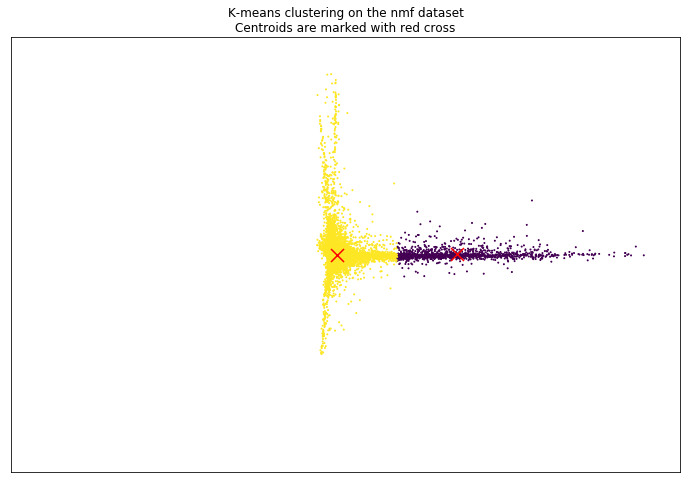

Homogeneity: 0.060
Completeness: 0.711
V-measure: 0.110
Adjusted Rand-Index: 0.010
Adjusted Mutual-Index: 0.060


In [12]:
#allset_tfidf


from sklearn.decomposition import PCA

#best value for NMF is 23
model = NMF(n_components=23, init='random', random_state=0)
nmf_mat= model.fit_transform(allset_tfidf) 


#reduce dimension to 2
reduced_data=PCA(n_components=2).fit_transform(nmf_mat)
kmeans=KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ. 
h = .001
# point in the mesh [x_min, x_max]x[y_min, y_max]. 
# Plot the decision boundary. For that, we will assign a color to each 
#x_min, x_max = reduced_data[:, 0].min() - 1,reduced_data[:, 0].max() + 1 
#y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1 
x_min,x_max=-0.2,0.2
y_min,y_max=-0.2,0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
# Obtain labels for each point in mesh. Use last trained model. 
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot 
Z = Z.reshape(xx.shape) 
plt.figure(1) 
plt.figure(figsize = (12,8))
plt.clf() 
#plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower') 
#plt.plot(nmf_mat[:, 0], nmf_mat[:, 1], 'k.', markersize=2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_,s=1)
# Plot the centroids as a white X 
centroids = kmeans.cluster_centers_ 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10) 
plt.title('K-means clustering on the nmf dataset\n' 'Centroids are marked with red cross')
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()
labels = allset.target
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, kmeans.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, kmeans.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, kmeans.labels_))
    

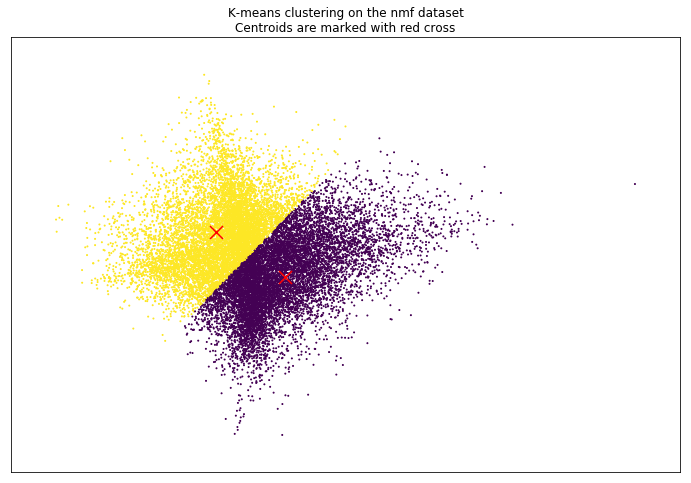

Homogeneity: 0.066
Completeness: 0.284
V-measure: 0.107
Adjusted Rand-Index: 0.035
Adjusted Mutual-Index: 0.065


In [148]:
#nmf normalize
n_nmf=scale(nmf_mat)
reduced_data=PCA(n_components=2).fit_transform(n_nmf)
kmeans=KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ. 
h = .001
# point in the mesh [x_min, x_max]x[y_min, y_max]. 
# Plot the decision boundary. For that, we will assign a color to each 
x_min, x_max = reduced_data[:, 0].min() - 1,reduced_data[:, 0].max() + 1 
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1 
#x_min,x_max=-0.2,0.2
#y_min,y_max=-0.2,0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
# Obtain labels for each point in mesh. Use last trained model. 
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot 
Z = Z.reshape(xx.shape) 
plt.figure(1) 
plt.figure(figsize = (12,8))
plt.clf() 
#plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower') 
#plt.plot(nmf_mat[:, 0], nmf_mat[:, 1], 'k.', markersize=2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_,s=1)
# Plot the centroids as a white X 
centroids = kmeans.cluster_centers_ 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10) 
plt.title('K-means clustering on the nmf dataset\n' 'Centroids are marked with red cross')
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()
labels = allset.target
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, kmeans.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, kmeans.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, kmeans.labels_))
    

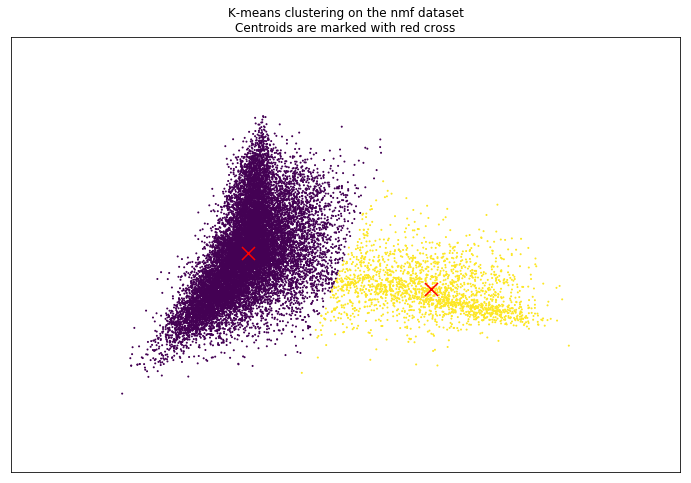

Homogeneity: 0.088
Completeness: 0.772
V-measure: 0.157
Adjusted Rand-Index: 0.020
Adjusted Mutual-Index: 0.087


In [149]:
#nmf log

log_all_nmf=np.log(0.01+nmf_mat)
reduced_data=PCA(n_components=2).fit_transform(log_all_nmf)
kmeans=KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ. 
h = .001
# point in the mesh [x_min, x_max]x[y_min, y_max]. 
# Plot the decision boundary. For that, we will assign a color to each 
x_min, x_max = reduced_data[:, 0].min() - 1,reduced_data[:, 0].max() + 1 
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1 
#x_min,x_max=-0.2,0.2
#y_min,y_max=-0.2,0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
# Obtain labels for each point in mesh. Use last trained model. 
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot 
Z = Z.reshape(xx.shape) 
plt.figure(1) 
plt.figure(figsize = (12,8))
plt.clf() 
#plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower') 
#plt.plot(nmf_mat[:, 0], nmf_mat[:, 1], 'k.', markersize=2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_,s=1)
# Plot the centroids as a white X 
centroids = kmeans.cluster_centers_ 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10) 
plt.title('K-means clustering on the nmf dataset\n' 'Centroids are marked with red cross')
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()
labels = allset.target
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, kmeans.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, kmeans.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, kmeans.labels_))

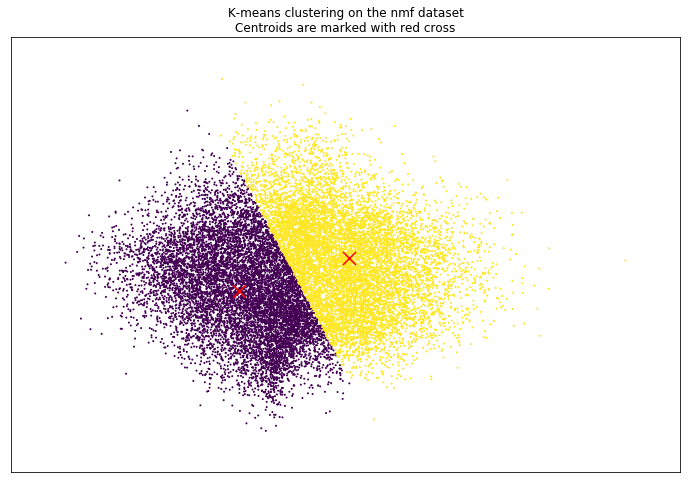

Homogeneity: 0.110
Completeness: 0.473
V-measure: 0.178
Adjusted Rand-Index: 0.054
Adjusted Mutual-Index: 0.110


In [150]:
#log first then norm
log_norm=scale(log_all_nmf)
reduced_data=PCA(n_components=2).fit_transform(log_norm)
kmeans=KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ. 
h = .001
# point in the mesh [x_min, x_max]x[y_min, y_max]. 
# Plot the decision boundary. For that, we will assign a color to each 
x_min, x_max = reduced_data[:, 0].min() - 1,reduced_data[:, 0].max() + 1 
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1 
#x_min,x_max=-0.2,0.2
#y_min,y_max=-0.2,0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
# Obtain labels for each point in mesh. Use last trained model. 
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot 
Z = Z.reshape(xx.shape) 
plt.figure(1) 
plt.figure(figsize = (12,8))
plt.clf() 
#plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower') 
#plt.plot(nmf_mat[:, 0], nmf_mat[:, 1], 'k.', markersize=2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_,s=1)
# Plot the centroids as a white X 
centroids = kmeans.cluster_centers_ 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10) 
plt.title('K-means clustering on the nmf dataset\n' 'Centroids are marked with red cross')
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()
labels = allset.target
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, kmeans.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, kmeans.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, kmeans.labels_))

[[-0.137374    4.27111332 -0.28961545 ..., -0.59314323 -0.43055803
  -0.20802241]
 [-0.137374   -0.37781042 -0.28961545 ..., -0.59314323 -0.43055803
  -0.20802241]
 [-0.03728224 -0.20840681 -0.28961545 ...,  0.83098003 -0.40306198
  -0.20802241]
 ..., 
 [-0.137374   -0.37781042 -0.28961545 ..., -0.59314323 -0.43055803
  -0.20802241]
 [-0.137374   -0.13805292  1.09655815 ..., -0.28851752 -0.29240326
  -0.20802241]
 [-0.137374   -0.37781042 -0.28961545 ..., -0.43160158 -0.43055803
   0.69187123]]


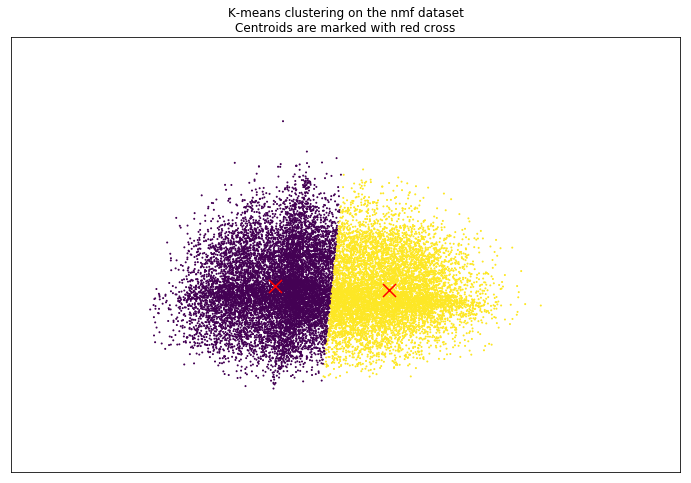

Homogeneity: 0.006
Completeness: 0.025
V-measure: 0.009
Adjusted Rand-Index: 0.003
Adjusted Mutual-Index: 0.005


In [155]:
#norm first then log
print(n_nmf)
norm_log=np.log(2+n_nmf)
reduced_data=PCA(n_components=2).fit_transform(norm_log)
kmeans=KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ. 
h = .001
# point in the mesh [x_min, x_max]x[y_min, y_max]. 
# Plot the decision boundary. For that, we will assign a color to each 
x_min, x_max = reduced_data[:, 0].min() - 1,reduced_data[:, 0].max() + 1 
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1 
#x_min,x_max=-0.2,0.2
#y_min,y_max=-0.2,0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
# Obtain labels for each point in mesh. Use last trained model. 
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot 
Z = Z.reshape(xx.shape) 
plt.figure(1) 
plt.figure(figsize = (12,8))
plt.clf() 
#plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower') 
#plt.plot(nmf_mat[:, 0], nmf_mat[:, 1], 'k.', markersize=2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_,s=1)
# Plot the centroids as a white X 
centroids = kmeans.cluster_centers_ 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10) 
plt.title('K-means clustering on the nmf dataset\n' 'Centroids are marked with red cross')
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()
labels = allset.target
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, kmeans.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, kmeans.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, kmeans.labels_))

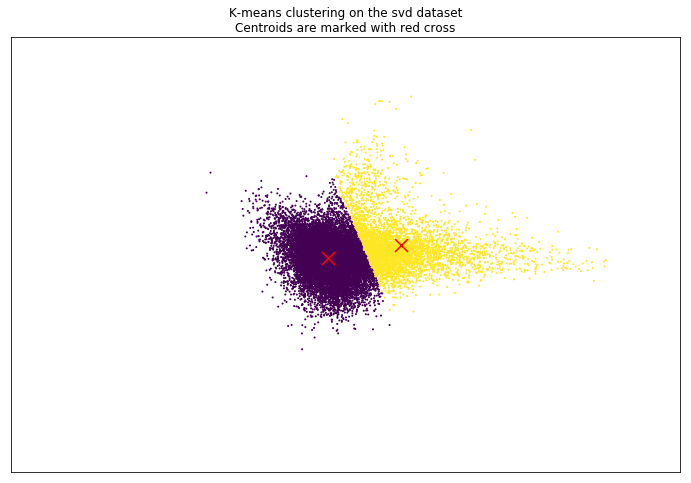

Homogeneity: 0.085
Completeness: 0.460
V-measure: 0.143
Adjusted Rand-Index: 0.030
Adjusted Mutual-Index: 0.085


In [23]:
#SVD
reduced_svd=PCA(n_components=2).fit_transform(transformed_tfidf) #svd n=10

kmeans=KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(reduced_svd)

# Step size of the mesh. Decrease to increase the quality of the VQ. 
h = .001
# point in the mesh [x_min, x_max]x[y_min, y_max]. 
# Plot the decision boundary. For that, we will assign a color to each 
#x_min, x_max = reduced_svd[:, 0].min() - 1,reduced_svd[:, 0].max() + 1 
#y_min, y_max = reduced_svd[:, 1].min() - 1, reduced_svd[:, 1].max() + 1 
x_min,x_max=-0.5,0.5
y_min,y_max=-0.5,0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
# Obtain labels for each point in mesh. Use last trained model. 
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot 
Z = Z.reshape(xx.shape) 
plt.figure(1) 
plt.figure(figsize = (12,8))
plt.clf() 
#plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower') 
#plt.plot(nmf_mat[:, 0], nmf_mat[:, 1], 'k.', markersize=2)
plt.scatter(reduced_svd[:, 0], reduced_svd[:, 1], c=kmeans.labels_,s=1)
# Plot the centroids as a white X 
centroids = kmeans.cluster_centers_ 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10) 
plt.title('K-means clustering on the svd dataset\n' 'Centroids are marked with red cross')
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()

labels = allset.target
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, kmeans.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, kmeans.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, kmeans.labels_))

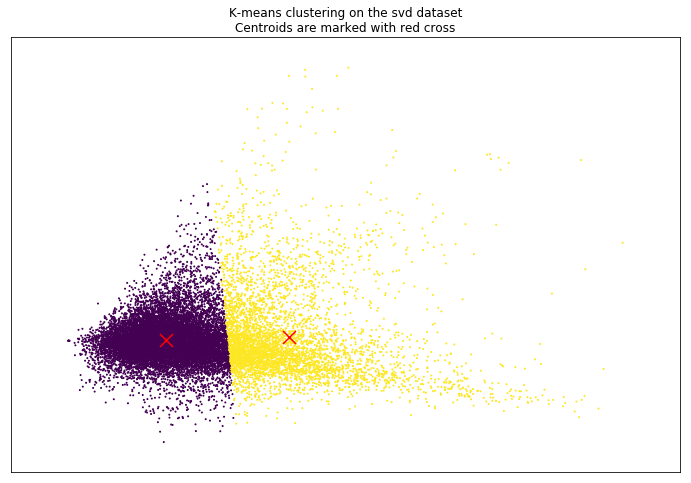

Homogeneity: 0.049
Completeness: 0.256
V-measure: 0.082
Adjusted Rand-Index: 0.020
Adjusted Mutual-Index: 0.049


In [163]:
#SVD normalize
svd_norm=scale(transformed_tfidf)
reduced_svd=PCA(n_components=2).fit_transform(svd_norm) #svd n=10
kmeans=KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(reduced_svd)

# Step size of the mesh. Decrease to increase the quality of the VQ. 
h = .001
# point in the mesh [x_min, x_max]x[y_min, y_max]. 
# Plot the decision boundary. For that, we will assign a color to each 
x_min, x_max = reduced_svd[:, 0].min() - 1,reduced_svd[:, 0].max() + 1 
y_min, y_max = reduced_svd[:, 1].min() - 1, reduced_svd[:, 1].max() + 1 
#x_min,x_max=-0.5,0.5
#y_min,y_max=-0.5,0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
# Obtain labels for each point in mesh. Use last trained model. 
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot 
Z = Z.reshape(xx.shape) 
plt.figure(1) 
plt.figure(figsize = (12,8))
plt.clf() 
#plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower') 
#plt.plot(nmf_mat[:, 0], nmf_mat[:, 1], 'k.', markersize=2)
plt.scatter(reduced_svd[:, 0], reduced_svd[:, 1], c=kmeans.labels_,s=1)
# Plot the centroids as a white X 
centroids = kmeans.cluster_centers_ 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10) 
plt.title('K-means clustering on the svd dataset\n' 'Centroids are marked with red cross')
plt.xlim(x_min, x_max) 
plt.ylim(y_min, y_max) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, kmeans.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, kmeans.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(labels, kmeans.labels_))
    